In [ ]:
%load_ext autoreload
%autoreload 2

import sys
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import rasterio

sys.path.append('..')
import pymoon
from pymoon.config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
N_PIXELS = 1000
shadows = True
max_shadow_steps = 25
gamma_correction = 1.5
outside_color = "#000000"  # black
radius = 0.95

theta_S = pymoon.config.THETA_SUN

alpha_deg = 70
s_vec = [np.sin(np.radians(alpha_deg)), 0, np.cos(np.radians(alpha_deg))]

obs_deg = 0
obs_vec = [np.sin(np.radians(obs_deg)), 0, np.cos(np.radians(obs_deg))]

models = ['binary', 'lambert', 'ls', 'ls_opposition']

In [22]:
moonfaces = []
for model in models:
    moonface = pymoon.main.get_moon_mask(
        N_PIXELS,
        s_vec,
        obs_vec=obs_vec,
        dem=PATH_LDEM_4,
        moonmap=PATH_LROC_COLOR_2K,
        theta_S=THETA_SUN,
        model=model,
        shadows=shadows,
        shadow_max_steps=max_shadow_steps, 
        gamma_corr=gamma_correction, 
        outside_color=outside_color,
        radius=radius, 
    )
    moonfaces.append(moonface)

Computing Shadows: 100%|██████████| 24/24 [00:04<00:00,  4.95it/s]


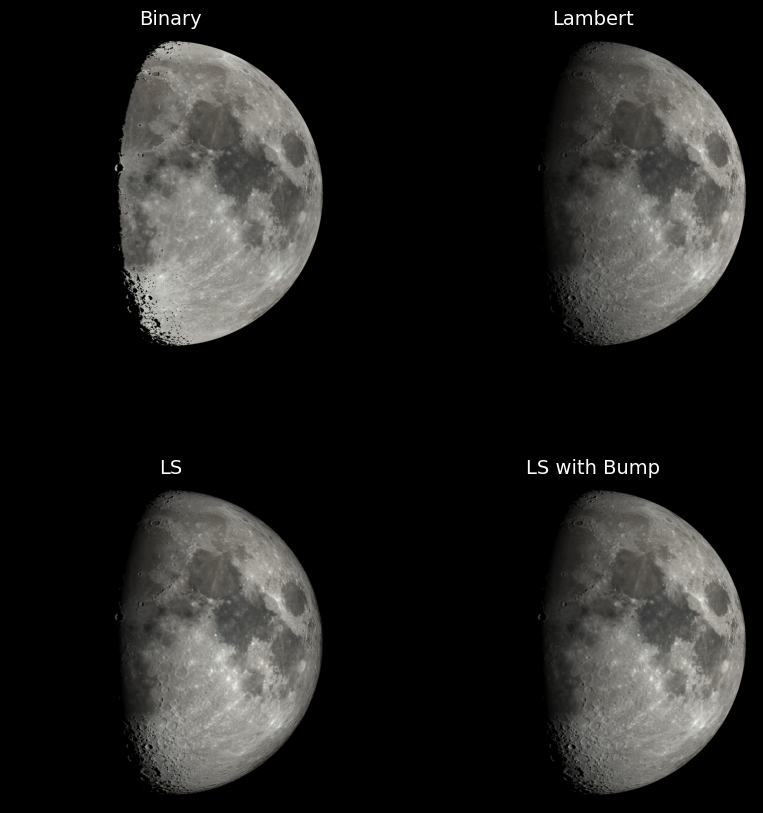

In [30]:
fs, r = 10, 1
fig, axs = plt.subplots(2, 2, figsize=(fs * r, fs))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

brightness_factors = [1] + [1.2] * 3

model_names = ['Binary', 'Lambert', 'LS', 'LS with Bump']
axs = axs.flatten()
for ax, moonface, model in zip(axs, moonfaces, model_names):
    moonface = moonface.astype(float)
    moonface = np.clip(moonface * brightness_factors[model_names.index(model)], 0, 255)
    moonface = moonface.astype(np.uint8)
    ax.imshow(moonface)
    ax.set_title(f'{model}', color='white', fontsize=14)
    ax.axis('off')

# faceolor black, fig facecolor all black
fig.patch.set_facecolor('black')

save_filename = "photometry.png"
save_folder = "plots_for_doc"  # Update this to your desired save path
plt.savefig(f"{save_folder}/{save_filename}", bbox_inches="tight", dpi=300)
plt.show()

In [29]:
moonfaces[0].max()

255

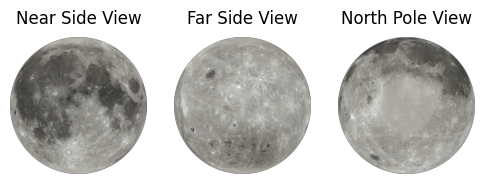

In [ ]:
# img1 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 0, 1))
# img2 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 0, -1))
# img3 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 1, 0))

# fs, r = 6, 1
# fig, axs = plt.subplots(1, 3, figsize=(fs * r, fs))
# plt.subplots_adjust(hspace=0.4)

# axs[0].imshow(img1)
# axs[1].imshow(img2)
# axs[2].imshow(img3)

# titles = [
#     "Near Side View",
#     "Far Side View",
#     "North Pole View",
# ]

# for i, ax in enumerate(axs):

#     ax.set_xticks([])
#     ax.set_yticks([])

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)

#     ax.set_title(
#         titles[i],
#         fontsize=12,
#         pad=10, 
#     )

# save_filename = "lunar_disk_different_views.png"
# save_folder = "plots_for_doc"  # Update this to your desired save path
# plt.savefig(f"{save_folder}/{save_filename}", bbox_inches="tight", dpi=300)
# plt.show()